# Redes Neurais Artificiais - Projeto Prático 2.1
## Aprendizado Supervisionado do Neurônio Perceptron



Importação das bibliotecas basicas.


In [ ]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import pandas as pd
from prettytable import PrettyTable

Calculando o identificador de exemplos

In [ ]:
# classes discretas
classes = (0, 1)

# idenfiticador
matriculas = [
    1815080004, # Eduardo
    2315310019, # Oziel
    2315310020 # Pedro
]
identificador = sum([matricula % 10 for matricula in matriculas]) % 4
identificador

1

Função de leitura de dados

In [ ]:
def get_data(file_path: str):
    data = np.fromfile(file_path, dtype=float)
    data = data.reshape((-1, 3)) # Ler dados de entrada em forma de matriz de 3 colunas
    return data

Definição do Perceptron

In [ ]:
class Perceptron():
  def __init__(self, w_interval: tuple[float], learn_rate: float, theta: float = 0.0, bias: int | None = None):
    self.bias = bias
    self.weights = np.random.uniform(w_interval[0], w_interval[1], 2 if not bias else 3)
    self.initial_weights = self.weights.copy()
    self.learn_rate = learn_rate
    self.theta = theta
    self.total_adjustments = 0
    self.complished_epochs = 0

  def __step_function(self, x):
    if x < self.theta: return 0
    return 1

  def __predict_raw(self, X):
    """soma pondereada de uma entrada qualuqer"""
    return np.dot(X, self.weights)

  def predict(self, X):
    if X.ndim == 1:
      return self.__step_function(self.__predict_raw(X))
    else:
      return np.array([self.__step_function(self.__predict_raw(x)) for x in X])

  def train(self, X_train, y_train, max_epochs: int | None = None,  shuffle: bool | None = None):
    self.total_adjustments = 0
    self.complished_epochs = 0

    while True:
      epoch_errors = 0
      if shuffle:
        idx = np.random.permutation(len(X_train))
        X_train = X_train[idx]
        y_train = y_train[idx]

      for i in range(len(X_train)):
        if shuffle:
          print(f"Entrada: {X_train[i]}, Saída Esperada: {y_train[i]}")
        x_sample = np.array(X_train[i]) if self.bias is None else np.insert(X_train[i], 0, self.bias)
        y_true = y_train[i]
        y_pred = self.predict(X=x_sample)
        e = y_true - y_pred

        if e != 0:
          self.weights += self.learn_rate * e * x_sample
          self.total_adjustments += 1
          epoch_errors += 1
      print(f"\n----- Epoch [{self.complished_epochs}]: Errors = {epoch_errors} | Weights: {self.weights} -----")
      self.complished_epochs += 1

      if epoch_errors == 0 and max_epochs is None:
        print("\nConvergência alcançada!")
        break

      if max_epochs is not None and self.complished_epochs >= max_epochs:
        print(f"\nNúmero máximo de épocas ({max_epochs}) alcançado!")
        break


### Parte 1 - Resolvendo um Problema Linearmente Separável

Lendo dados de entrada

In [ ]:
dados = get_data('dataAll.txt')
dados

array([[-363.7884,  244.1423,    0.    ],
       [ 328.7572, -256.7658,    1.    ],
       [-164.9827,  613.2164,    0.    ],
       ...,
       [ 872.4311,  669.1192,    1.    ],
       [ 822.6894, -702.6489,    1.    ],
       [-140.147 ,  734.0983,    0.    ]])

In [ ]:
dados.shape

(1000, 3)

Inicialização do Perceptron + Pesos iniciais

In [ ]:
n = 0.1
theta = 0.0
w_interval = (-0.5, 0.5)

perceptron_1 = Perceptron(learn_rate=n, theta=theta, w_interval=w_interval)
perceptron_1.initial_weights

array([0.17531852, 0.08461029])

Executando o algortimo até a convergência

In [ ]:
X_train = dados[:, 0:2]
y_train = dados[:, 2]

perceptron_1.train(X_train=X_train, y_train=y_train)


----- Epoch [0]: Errors = 27 | Weights: [ 232.51191852 -231.57929971] -----

----- Epoch [1]: Errors = 0 | Weights: [ 232.51191852 -231.57929971] -----

Convergência alcançada!


Mostrando os resultados

Total de ajustes no vetor de pesos: 27
Número de épocas até a convergência: 2



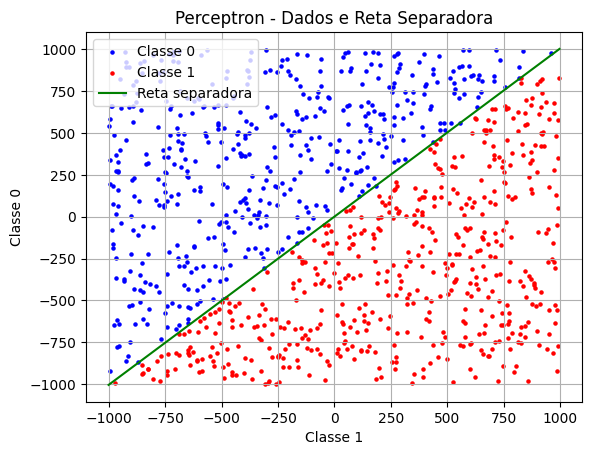

In [ ]:
# Pesos + Epocas
print(f"Total de ajustes no vetor de pesos: {perceptron_1.total_adjustments}")
print(f"Número de épocas até a convergência: {perceptron_1.complished_epochs}\n")

# Plotando os pontos no gráfico, 0 em azul e 1 em vermelho
for target in classes:
    idx = y_train == target
    if target == 0:
      cor, label = 'blue', 'Classe 0'
    else:
      cor, label = 'red', 'Classe 1'
    plt.scatter(dados[idx, 0], dados[idx, 1], c=cor, label=label, s=5)

# Criar a reta separadora
x_vals = np.linspace(np.min(dados[:, 0]) - 1, np.max(dados[:, 0]) + 1, 200)
weights = perceptron_1.weights
if weights[1] != 0:
    y_vals = -(weights[0] * x_vals) / weights[1]
    plt.plot(x_vals, y_vals, 'green', label='Reta separadora')
else: # Reta é vertical
    x_vert = 0
    plt.axvline(x=x_vert, color='green', label='Reta separadora')

plt.xlabel('Classe 1')
plt.ylabel('Classe 0')
plt.title('Perceptron - Dados e Reta Separadora')
plt.legend()
plt.grid(True)
plt.show()

### Parte 2 - Experimentação

Importando Dados

In [ ]:
# p2 = Parte 2
dados_p2 = get_data('data1.txt')
dados_p2

array([[ 0.13658687, -0.16460088,  0.        ],
       [-0.0228559 , -0.01094684,  0.        ],
       [-0.02654897,  0.00582183,  0.        ],
       ...,
       [ 0.99007304,  0.8921047 ,  1.        ],
       [ 0.91691441,  1.15684083,  1.        ],
       [ 0.99252852,  1.06937678,  1.        ]])

In [ ]:
dados_p2.shape

(600, 3)

Definindo Configurações

In [ ]:
X_train = dados_p2[:, 0:2]
y_train = dados_p2[:, 2]

N_p2 = [0.4, 0.1, 0.01]
I = [(-100, 100),(-0.5, 0.5)]
REP = 10

Executando o Experimento

In [ ]:
resultados_p2 = {} # Dicionário para armazenar todos os resultados_p2

for n in N_p2:
  print("Taxa de Aprendizado: ", n)

  for inter in I:
    print("Intervalo: ", inter)
    menor_num_epocas = float('inf') # Maior valor possível para depois comparar
    conj_total_ajustes = []

    for r in range(REP):
      print("Repetição: ", r)

      perceptron_2 = Perceptron(learn_rate=n, w_interval=inter, bias=1)
      perceptron_2.train(X_train=X_train, y_train=y_train)

      epoch = perceptron_2.complished_epochs
      adjusts = perceptron_2.total_adjustments

      if(epoch < menor_num_epocas):
        menor_num_epocas = epoch
      conj_total_ajustes.append(adjusts)

    media_total_ajustes = np.mean(conj_total_ajustes)
    dp_total_ajustes = np.std(conj_total_ajustes)
    resultados_p2[(n, tuple(inter))] = (menor_num_epocas, media_total_ajustes, dp_total_ajustes)

Streaming output truncated to the last 5000 lines.

----- Epoch [540]: Errors = 2 | Weights: [-51.38654894  22.95395759  39.00852714] -----

----- Epoch [541]: Errors = 2 | Weights: [-51.38654894  22.9608188   39.00340925] -----

----- Epoch [542]: Errors = 2 | Weights: [-51.38654894  22.96768002  38.99829136] -----

----- Epoch [543]: Errors = 2 | Weights: [-51.38654894  22.97454123  38.99317347] -----

----- Epoch [544]: Errors = 2 | Weights: [-51.38654894  22.98140245  38.98805559] -----

----- Epoch [545]: Errors = 2 | Weights: [-51.38654894  22.98826366  38.9829377 ] -----

----- Epoch [546]: Errors = 2 | Weights: [-51.38654894  22.99512488  38.97781981] -----

----- Epoch [547]: Errors = 2 | Weights: [-51.38654894  23.00198609  38.97270192] -----

----- Epoch [548]: Errors = 2 | Weights: [-51.38654894  23.0088473   38.96758403] -----

----- Epoch [549]: Errors = 2 | Weights: [-51.38654894  23.01570852  38.96246614] -----

----- Epoch [550]: Errors = 2 | Weights: [-51.38654894  23

Apresentando Resultados

In [ ]:
tabela = PrettyTable()
tabela.field_names = ["Taxa de Aprendizado (η)",
                      "Intervalo de Pesos",
                      "Média Total de Ajustes ± Desvio Padrão",
                      "Menor Número de Épocas"]

for key, values in resultados_p2.items():
    n = key[0]
    inter = key[1]  # tuple(inter)
    menor_epocas = values[0]
    media_ajustes = values[1]
    dp_ajustes = values[2]

    tabela.add_row([
        f"{n:g}",
        f"[{inter[0]}, {inter[1]}]",
        f"{media_ajustes:.2f} ± {dp_ajustes:.2f}",
        menor_epocas
    ])

print(tabela)

+-------------------------+--------------------+----------------------------------------+------------------------+
| Taxa de Aprendizado (η) | Intervalo de Pesos | Média Total de Ajustes ± Desvio Padrão | Menor Número de Épocas |
+-------------------------+--------------------+----------------------------------------+------------------------+
|           0.4           |    [-100, 100]     |            394.20 ± 188.98             |           3            |
|           0.4           |    [-0.5, 0.5]     |             40.50 ± 12.23              |           4            |
|           0.1           |    [-100, 100]     |            807.00 ± 553.99             |           3            |
|           0.1           |    [-0.5, 0.5]     |             37.20 ± 19.75              |           4            |
|           0.01          |    [-100, 100]     |           15457.90 ± 8700.44           |           74           |
|           0.01          |    [-0.5, 0.5]     |             89.00 ± 47.68      

**Discussão de Resultados**

Para as Taxas de Aprendizado utilizadas:
- η = 0.4 apresentou os melhores resultados para as taxas utilizadas, tendo as melhores combinações de Média de ajustes e Desvio Padrão junto de um número baixo de épocas;
- η = 0.1 teve resultados similares à η = 0.4, tendo até o mesmo número de épocas, no entanto, no Intervalo (-100, 100) foram necessários muito mais ajustes para se obter convergência;
- η = 0.01 demonstrou os resultados mais discrepantes, tendo um menor número de épocas fora dos padrões observados em outras taxas, além de ter a maior média de ajustes e desvio padrão para ambos os intervalos.

Conclui-se que uma Taxa de Aprendizado muito baixa torna o treinamento mais lento devido a grande quantidade de ajustes necessários para se atingir o resultado desejado, enquanto uma taxa maior acelera o processo de convergência e, consequentemente, de treinamento.

Para os Intervalos de Peso:
- Intervalos maiores possibilitam a geração de pesos maiores, que podem dificultar o treinamento do modelo, especialmente para Taxas de Aprendizado menores;
- Intervalos menores apresentaram médias e desvios padrões menores, indicando que pesos iniciais mais próximos de zero ajudam a convergir.

Portanto, Intervalos menores melhoram a performance e estabilidade do treinamento, enquanto Intervalos maiores aumentam a variabilidade e podem comprometer o processamento.

Neste experimento, duas configurações se apresentaram como melhores, sendo elas: Taxa de Aprendizado = 0.4 e Intervalo de Pesos (-0.5, 0.5), e Taxa de Aprendizado = 0.1 e Intervalo de Pesos (-0.5, 0.5). Ambas demonstraram uma excelente combinação de Média e Desvio Padrão baixos com um pequeno Número de Épocas necessárias para convergir. Vale ressaltar também que, apesar de ambos os modelos serem similares em performance, a primeira configuração se provou ser levemente mais estável, enquanto a segunda pode ser teoricamente mais rápida, mas está sujeita a uma maior variabilidade.

A pior configuração apresentada nesse experimento foi Taxa de Aprendizado = 0.01 e Intervalo de Pesos (-100, 100), onde foram apresentados valores insatisfatórios, contendo os maiores valores em todo o treinamento para as métricas de Média de Ajustes, Desvio Padrão de Ajustes e Número de Épocas.

### Parte 3 - Validação Holdout em Problema Não-Linearmente Separável

Importando os dados

In [ ]:
# Apresentação dos dados em dataHoldout
dados_p3 = get_data('dataHoldout.txt')
dados_p3

array([[-0.29322959, -0.09065359,  1.        ],
       [ 0.07988839,  0.21101297,  1.        ],
       [-0.07825563, -0.08083512,  1.        ],
       ...,
       [ 0.65980493,  1.05876739,  0.        ],
       [ 1.09867123,  0.87404891,  0.        ],
       [ 0.72930655,  0.93224271,  0.        ]])

In [ ]:
dados_p3.shape

(800, 3)

Mostrando a não-linearidade dos dados

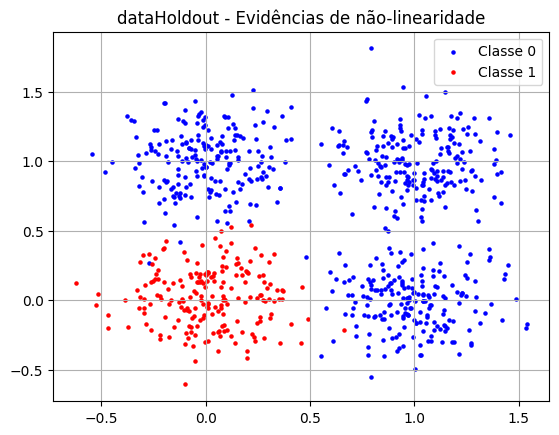

In [ ]:
# plotar o gráfico que represente os dados em dataHoldout
for target in classes:
    idx = dados_p3[:, 2] == target
    if target == 0:
      cor, label = 'blue', 'Classe 0'
    else:
      cor, label = 'red', 'Classe 1'
    plt.scatter(dados_p3[idx, 0], dados_p3[idx, 1], c=cor, label=label, s=5)

plt.title('dataHoldout - Evidências de não-linearidade')
plt.legend()
plt.grid(True)
plt.show()

Importação das bibliotecas scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score

Divisão dos exemplos em 30/70

In [ ]:
X = dados_p3[:, 0:2]
y = dados_p3[:, 2]

random_seed = identificador

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed)
print(f"train size: {X_train.shape} | test size: {y_train.shape}")

train size: (560, 2) | test size: (560,)


Inicialização de hiperparâmetros sugeridos pela literatura

In [ ]:
n = 0.1
w_interval = (-0.5, 0.5)
max_epochs = 100

Execução do algoritmo por 100 épocas

In [ ]:
perceptron_3 = Perceptron(learn_rate=n, w_interval=w_interval)
perceptron_3.train(X_train=X_train, y_train=y_train, shuffle=True, max_epochs=max_epochs)

Streaming output truncated to the last 5000 lines.
Entrada: [0.30399699 0.00645548], Saída Esperada: 1.0
Entrada: [-0.28620777  1.059365  ], Saída Esperada: 0.0
Entrada: [-0.10038537 -0.60750339], Saída Esperada: 1.0
Entrada: [1.25357865 1.1934082 ], Saída Esperada: 0.0
Entrada: [-0.23436994  0.03978647], Saída Esperada: 1.0
Entrada: [-0.25518628  0.85789816], Saída Esperada: 0.0
Entrada: [1.36365181 0.31253161], Saída Esperada: 0.0
Entrada: [0.06747976 0.85670159], Saída Esperada: 0.0
Entrada: [0.83888643 0.07358649], Saída Esperada: 0.0
Entrada: [0.04070907 0.1350255 ], Saída Esperada: 1.0
Entrada: [-0.01545201  0.94861297], Saída Esperada: 0.0
Entrada: [0.96515029 0.79694364], Saída Esperada: 0.0
Entrada: [ 0.20013586 -0.41657686], Saída Esperada: 1.0
Entrada: [1.35758952 1.31292817], Saída Esperada: 0.0
Entrada: [-0.09317084  1.13996994], Saída Esperada: 0.0
Entrada: [0.01327531 1.10693866], Saída Esperada: 0.0
Entrada: [0.03416729 0.17169338], Saída Esperada: 1.0
Entrada: [1.26957

Previsão da saída do neurônio para o conjunto de testes

In [ ]:
y_pred = perceptron_3.predict(X_test)

Matriz de Confusão

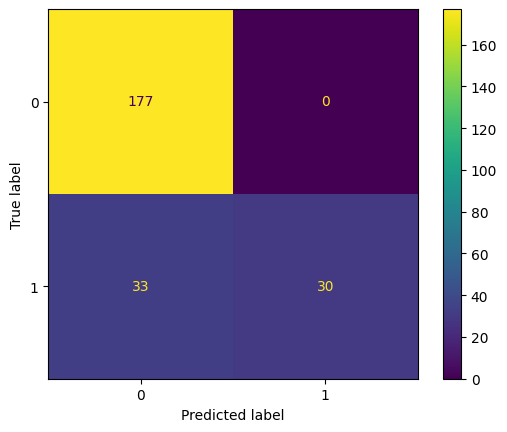

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
plt.show()

Acurácia para os dados de treinamento inicialmente fornecidos

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.8625


Desmonstração das outras métricas solicitadas

In [ ]:
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1-Score: {f1_score(y_test, y_pred)}")

Precision: 1.0
Recall: 0.47619047619047616
F1-Score: 0.6451612903225806


## Análise da qualidade da solução obtida:

O treinamento do Perceptron em um problema não-linear produziu resultados que, embora pareçam promissores à primeira vista, revelam uma solução de qualidade limitada quando analisada em profundidade. As métricas obtidas confirmam as dificuldades inerentes a um classificador linear diante de um problema complexo:

- **Acurácia**: A acurácia obtida deste modelo varia entre 80% e 86%, apontando que o modelo acerta a maioria de suas classificações. No entanto, no contexto desse problema, a métrica acaba sendo enganosa, visto que as outras métricas apontam um carater desbalanceado de acertos.
- **Precisão**: A precisão obtida deste modelo varia entre 83% e 100%. Indicando que, sempre que o modelo classificou uma amostra como positiva, ele estava correto. Isso sugere que o modelo é muito "cauteloso" e evita ao máximo cometer erros de falso positivo.
- **Revocação**: A revocação obtida deste modelo varia entre 44% e 46%. Sendo, em média, a métrica mais baixa apontada durante os testes. A baixa revocação revela que o modelo falhou em identificar a maioria das amostras que eram realmente positivas. Ele "deixou passar" mais da metade dos casos que deveria ter encontrado.
- **F1-Score**: A F1-Score obtida deste modelo permanece na faixa de 64%. Sendo a métrica que busca um equilíbrio entre precisão e revocação, é possível notar a disparidade entre estas duas. O valor de ~64% é consideravelmente baixo e confirma que o desempenho do modelo é comprometido pela sua incapacidade de encontrar todos os casos positivos, apesar de sua alta precisão.

### Conclusão:
As métricas obtidas deixam claro que a solução do Perceptron lida bem com a classificação dos verdadeiros positivos, mas apresenta uma grande falha na identificação dos falsos negativos. O modelo é excessivamente conservador e, para evitar erros do tipo falso positivo, sacrifica a sua capacidade de encontrar a maioria das amostras positivas, resultando em um desempenho insatisfatório para a solução do problema não-linear.

Imagem com Dados de treinamento X Imagem com dados de teste

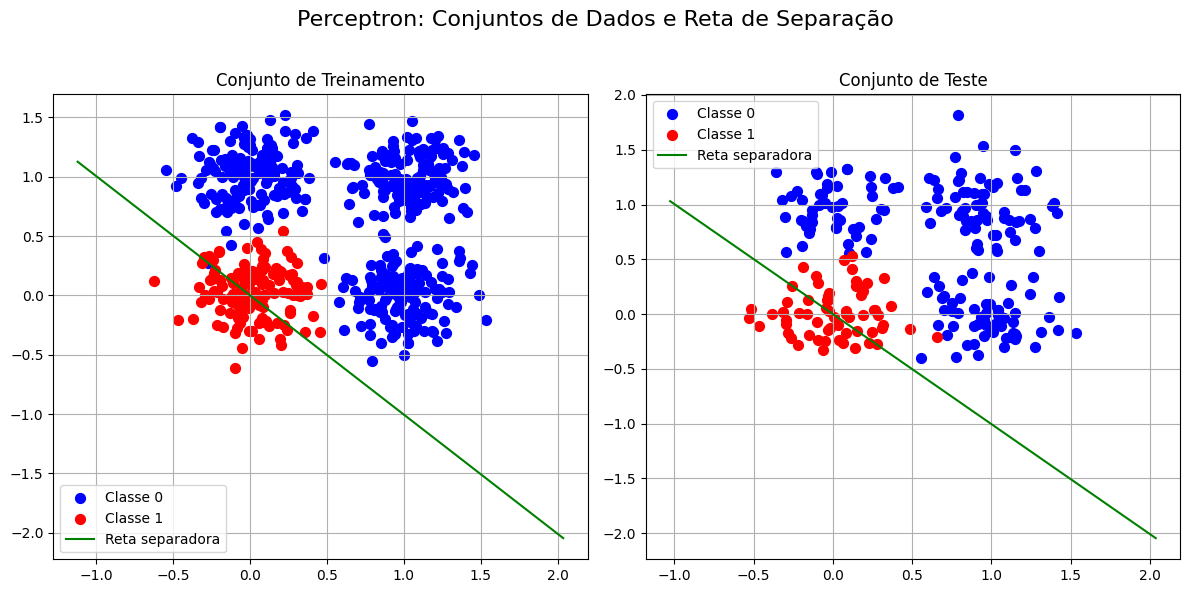

In [ ]:
final_weights = perceptron_3.weights

# --- Criação dos Gráficos Lado a Lado ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Perceptron: Conjuntos de Dados e Reta de Separação', fontsize=16)

# --- Gráfico do Conjunto de Treinamento (ax1) ---
ax1.set_title('Conjunto de Treinamento')

# Plotar os pontos de treinamento
for target in classes:
    idx = y_train == target
    cor, label = ('blue', 'Classe 0') if target == 0 else ('red', 'Classe 1')
    ax1.scatter(X_train[idx, 0], X_train[idx, 1], c=cor, label=label, s=50)

# Criar a reta separadora no gráfico de treinamento
x_vals = np.linspace(np.min(X_train[:, 0]) - 0.5, np.max(X_train[:, 0]) + 0.5, 200)
if final_weights[1] != 0:
    # y = -(w0 + w1*x) / w2
    y_vals = (weights[0] * x_vals) / weights[1]
    ax1.plot(x_vals, y_vals, 'green', label='Reta separadora')
else:
    # Reta vertical se w2 for zero
    x_vert = -final_weights[0] / final_weights[1]
    ax1.axvline(x=x_vert, color='green', label='Reta separadora')

ax1.legend()
ax1.grid(True)

# --- Gráfico do Conjunto de Teste (ax2) ---
ax2.set_title('Conjunto de Teste')

# Plotar os pontos de teste
for target in classes:
    idx = y_test == target
    cor, label = ('blue', 'Classe 0') if target == 0 else ('red', 'Classe 1')
    # Use um marcador diferente para o teste, como 's' (quadrado)
    ax2.scatter(X_test[idx, 0], X_test[idx, 1], c=cor, label=label, s=50)

# Adicionar a mesma reta separadora do treinamento no gráfico de teste
x_vals = np.linspace(np.min(X_test[:, 0]) - 0.5, np.max(X_test[:, 0]) + 0.5, 200)
if final_weights[1] != 0:
    y_vals = (weights[0] * x_vals) / weights[1]
    ax2.plot(x_vals, y_vals, 'green', label='Reta separadora')
else:
    x_vert = -final_weights[0] / final_weights[1]
    ax2.axvline(x=x_vert, color='green', label='Reta separadora')

ax2.legend()
ax2.grid(True)

# Ajusta o layout para evitar que os títulos se sobreponham
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()